<div style="text-align: center; background-color: lightblue; padding: 20px;">
    <h1 style="color:white; font-family: 'Arial', sans-serif;">Is Vaccinated Project</h1>
</div>



In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import matplotlib

In [96]:
pd.set_option("display.max_columns", None)

In [97]:
# plt.style.use("dark_background")

In [98]:
df = pd.read_csv("h1n1_vaccine_prediction.csv")

In [99]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [100]:
df.shape

(26707, 34)

In [101]:
df.shape

(26707, 34)

In [102]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

# Handling Missing Values

In [103]:
mode_df = df.mode().iloc[0] 

In [104]:
mode_df

unique_id                                            0
h1n1_worry                                         2.0
h1n1_awareness                                     1.0
antiviral_medication                               0.0
contact_avoidance                                  1.0
bought_face_mask                                   0.0
wash_hands_frequently                              1.0
avoid_large_gatherings                             0.0
reduced_outside_home_cont                          0.0
avoid_touch_face                                   1.0
dr_recc_h1n1_vacc                                  0.0
dr_recc_seasonal_vacc                              0.0
chronic_medic_condition                            0.0
cont_child_undr_6_mnths                            0.0
is_health_worker                                   0.0
has_health_insur                                   1.0
is_h1n1_vacc_effective                             4.0
is_h1n1_risky                                      2.0
sick_from_

In [105]:
df.fillna(mode_df , inplace = True)

In [106]:
df.isnull().sum().sum()

0

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
encoder = LabelEncoder()

In [109]:
df.head(1)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0


## Encoding

In [110]:
le = LabelEncoder()

In [111]:
race = le.fit_transform(df.race)
df.race = pd.DataFrame(race)

sex = le.fit_transform(df.sex)
df.sex = pd.DataFrame(sex)

status = le.fit_transform(df.marital_status)
df.marital_status = pd.DataFrame(status)

house = le.fit_transform(df.housing_status)
df.housing_status = pd.DataFrame(house)

employ = le.fit_transform(df.employment)
df.employment = pd.DataFrame(employ)

cencus = le.fit_transform(df.census_msa)
df.census_msa = pd.DataFrame(cencus)

age = le.fit_transform(df.age_bracket)
df.age_bracket = pd.DataFrame(age)

educ = le.fit_transform(df.qualification)
df.qualification = pd.DataFrame(educ)

income = le.fit_transform(df.income_level)
df.income_level = pd.DataFrame(income)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [113]:
df.drop("unique_id",axis =1,  inplace = True)

In [114]:
df.head(1)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,1,0,1,2,0.0,0.0,0


In [115]:
x = df.drop("h1n1_vaccine", axis =1)
y = df.h1n1_vaccine

In [116]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

## EDA

Text(0, 0.5, 'Number of People')

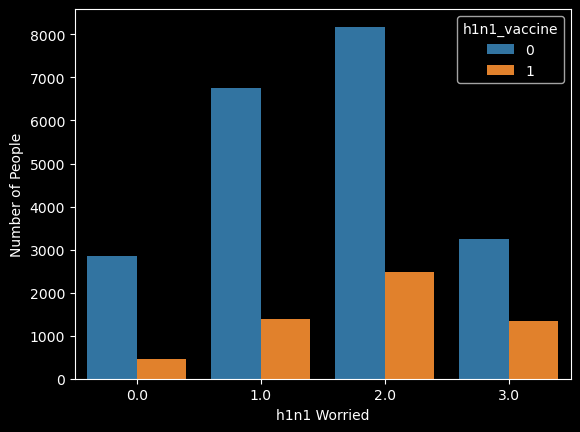

In [117]:
sns.countplot(x = df.h1n1_worry , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("h1n1 Worried")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

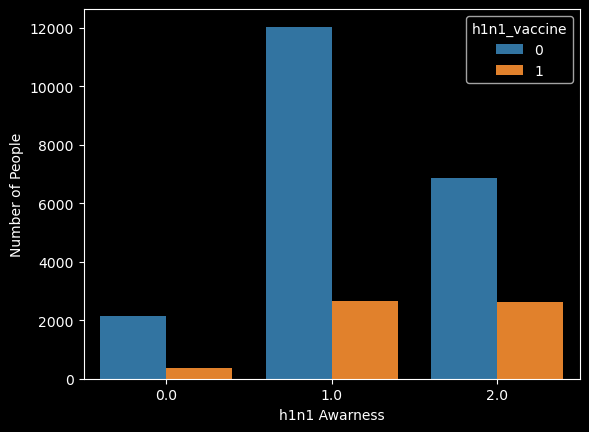

In [118]:
sns.countplot(x = df.h1n1_awareness , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("h1n1 Awarness")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

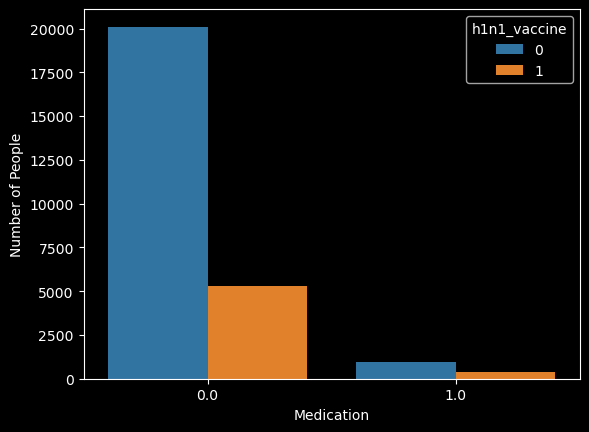

In [119]:
sns.countplot(x = df.antiviral_medication , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Medication")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

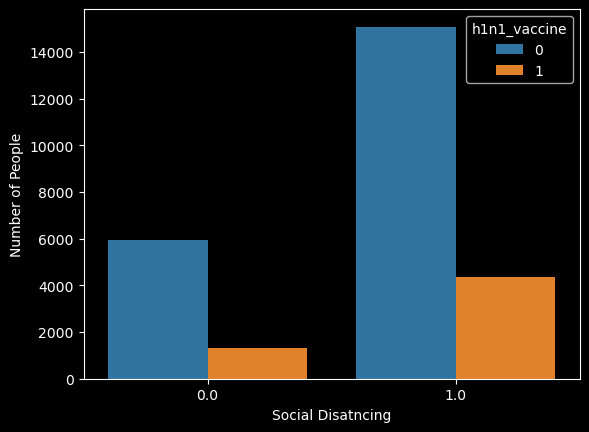

In [120]:
sns.countplot(x = df.contact_avoidance , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Social Disatncing")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

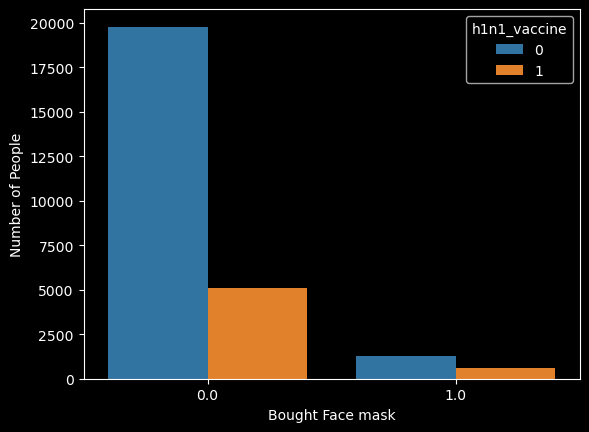

In [121]:
sns.countplot(x = df.bought_face_mask , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Bought Face mask")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

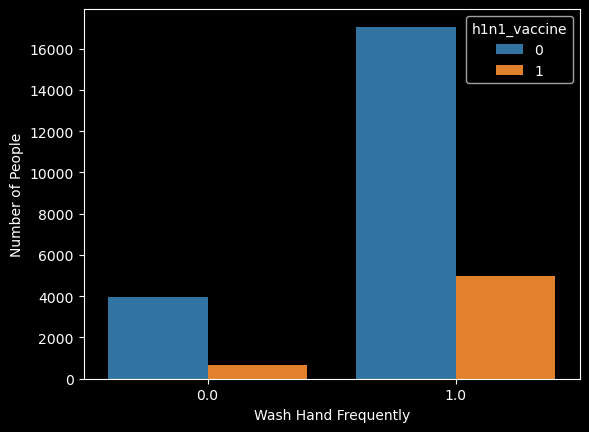

In [122]:
sns.countplot(x = df.wash_hands_frequently , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Wash Hand Frequently")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

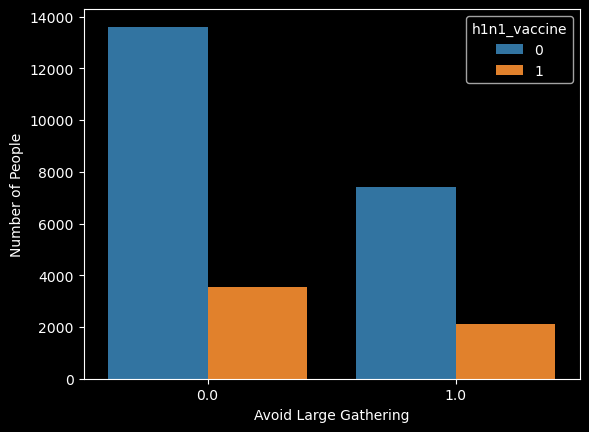

In [123]:
sns.countplot(x = df.avoid_large_gatherings, hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Avoid Large Gathering")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

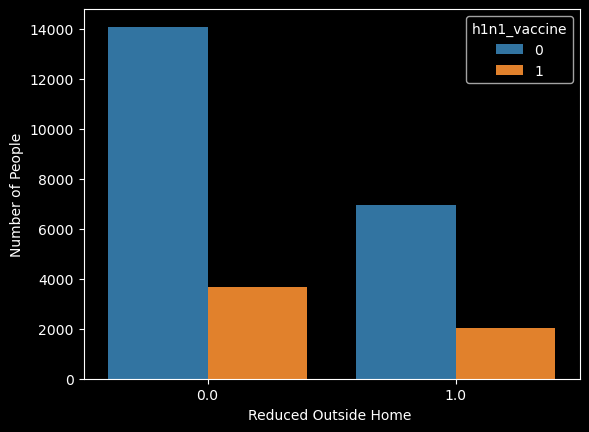

In [124]:
sns.countplot(x = df.reduced_outside_home_cont , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Reduced Outside Home ")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

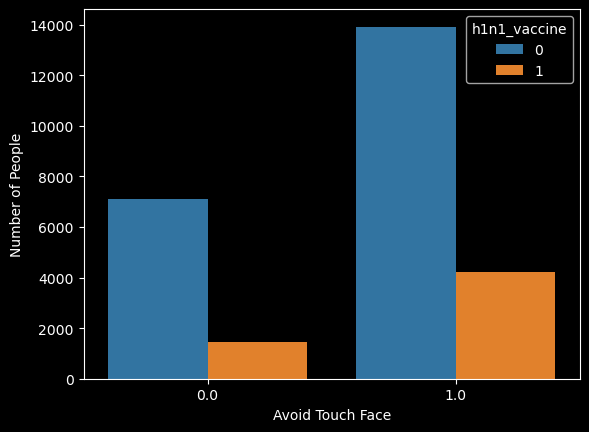

In [125]:
sns.countplot(x = df.avoid_touch_face , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Avoid Touch Face")
plt.ylabel("Number of People")

In [126]:
df.head(1)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,1,0,1,2,0.0,0.0,0


Text(0, 0.5, 'Number of People')

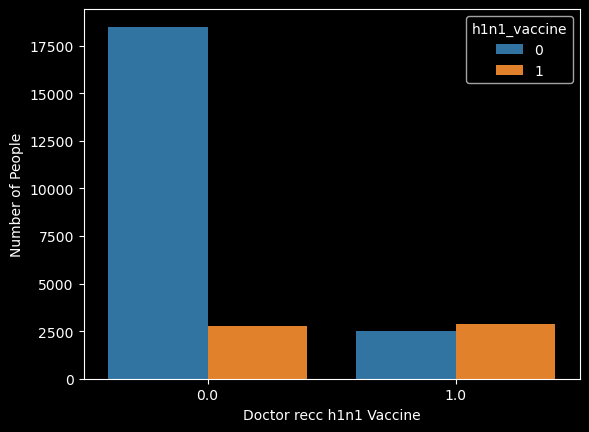

In [127]:
sns.countplot(x = df.dr_recc_h1n1_vacc , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Doctor recc h1n1 Vaccine")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

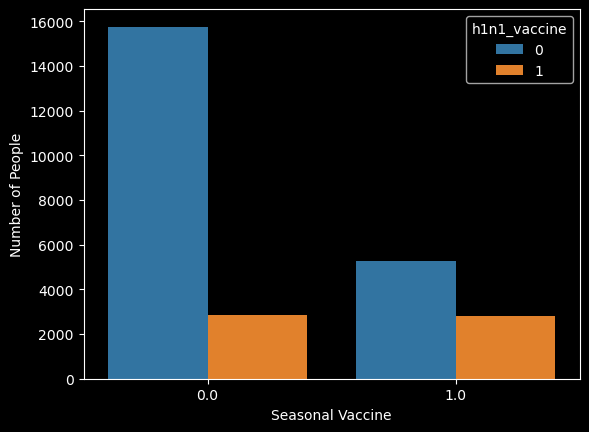

In [128]:
sns.countplot(x = df.dr_recc_seasonal_vacc , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Seasonal Vaccine")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

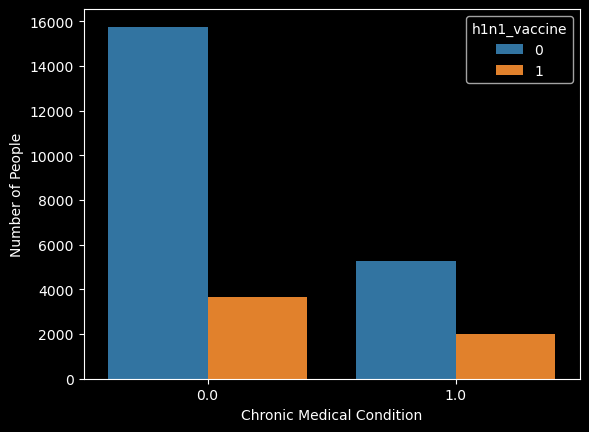

In [129]:
sns.countplot(x = df.chronic_medic_condition , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Chronic Medical Condition")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

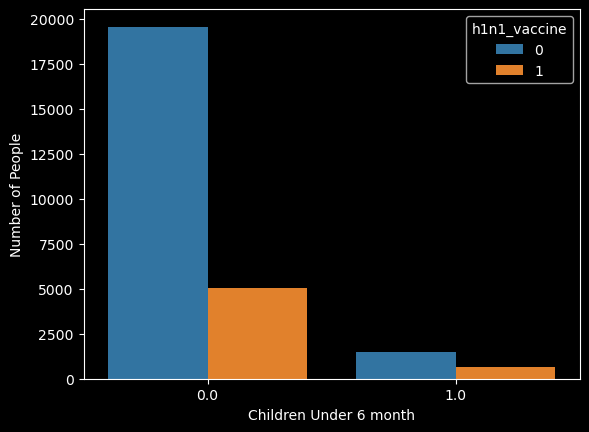

In [130]:
sns.countplot(x = df.cont_child_undr_6_mnths , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Children Under 6 month")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

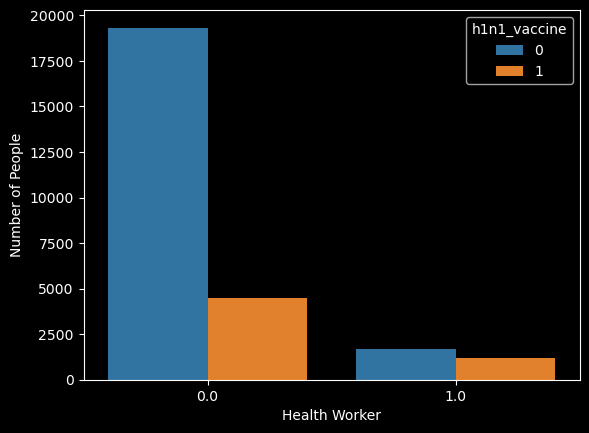

In [131]:
sns.countplot(x = df.is_health_worker , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Health Worker")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

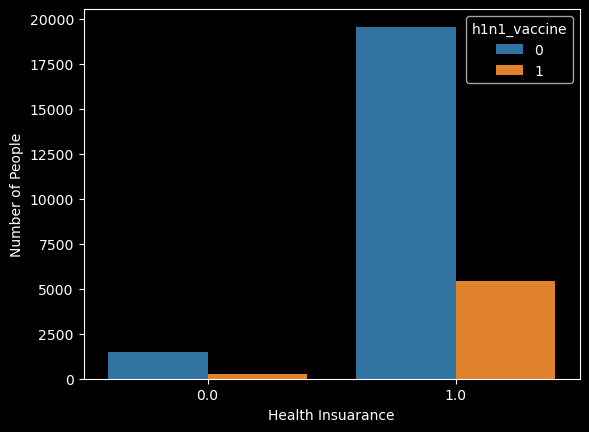

In [132]:
sns.countplot(x = df.has_health_insur , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Health Insuarance")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

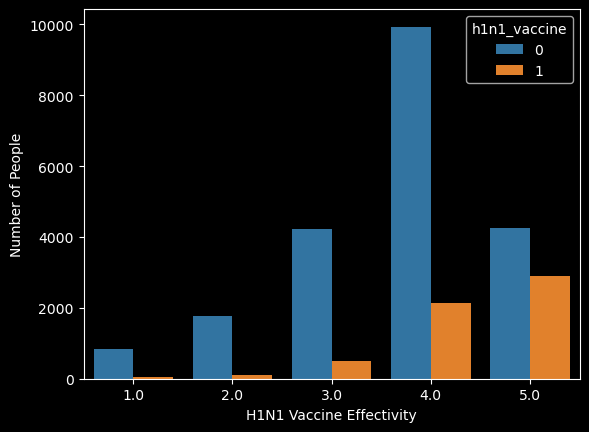

In [133]:
sns.countplot(x = df.is_h1n1_vacc_effective , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("H1N1 Vaccine Effectivity")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

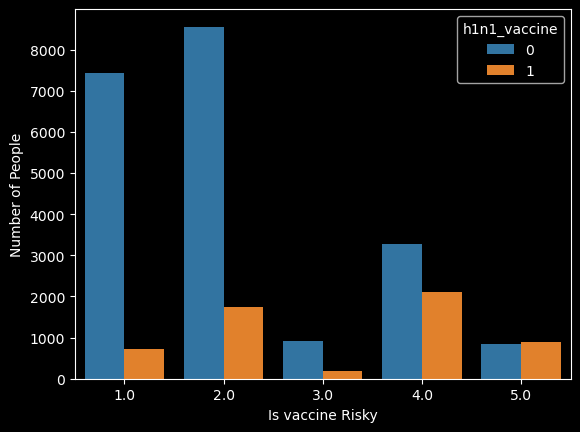

In [134]:
sns.countplot(x = df.is_h1n1_risky , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Is vaccine Risky")
plt.ylabel("Number of People")

In [135]:
df.head(1)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,1,0,1,2,0.0,0.0,0


Text(0, 0.5, 'Number of People')

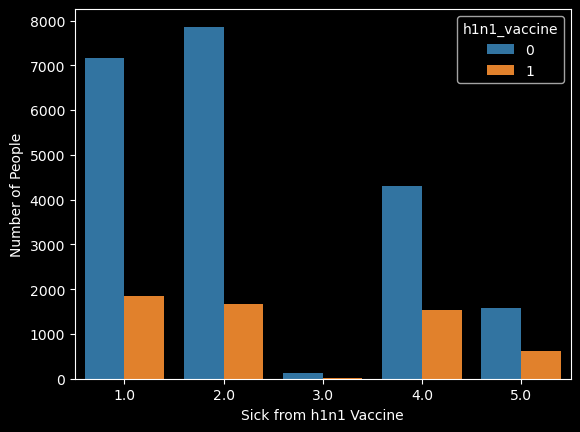

In [136]:
sns.countplot(x = df.sick_from_h1n1_vacc , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Sick from h1n1 Vaccine")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

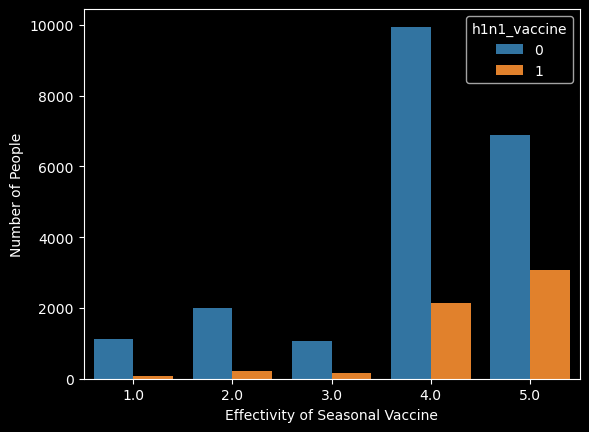

In [137]:
sns.countplot(x = df.is_seas_vacc_effective , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Effectivity of Seasonal Vaccine")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

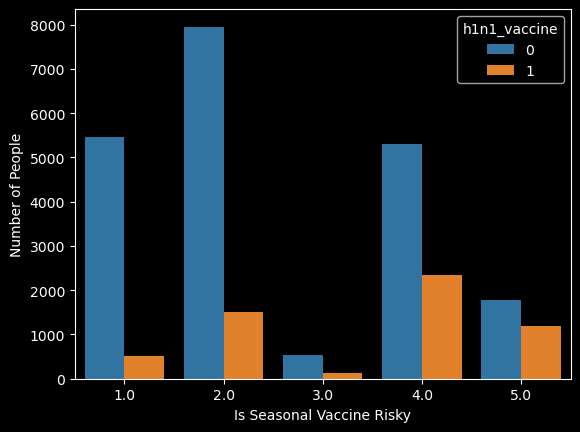

In [138]:
sns.countplot(x = df.is_seas_risky , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Is Seasonal Vaccine Risky")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

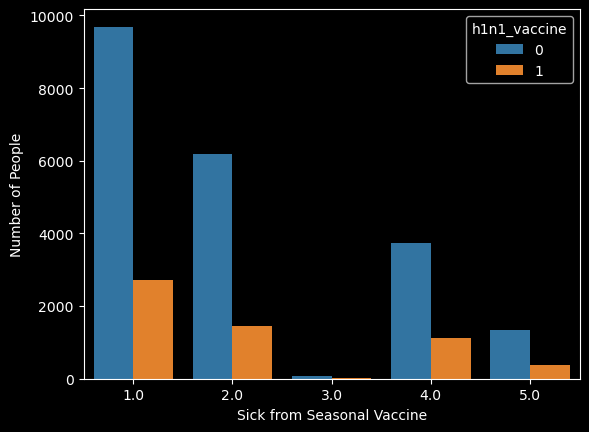

In [139]:
sns.countplot(x = df.sick_from_seas_vacc , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Sick from Seasonal Vaccine")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

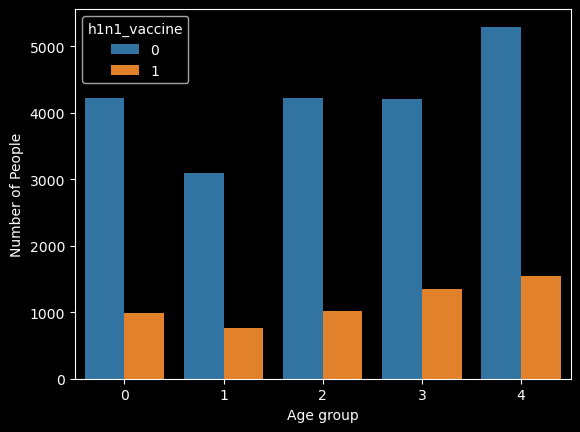

In [140]:
sns.countplot(x = df.age_bracket , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Age group")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

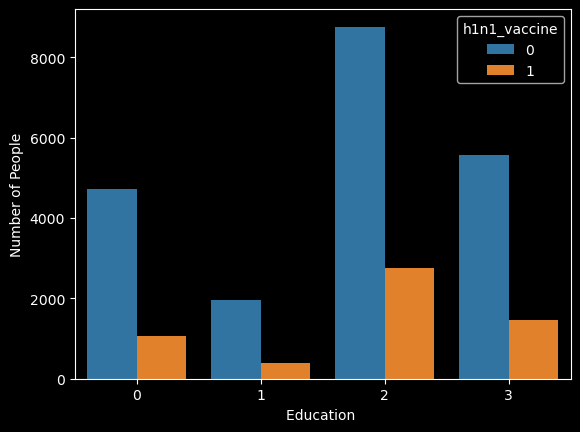

In [141]:
sns.countplot(x = df.qualification , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Education ")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

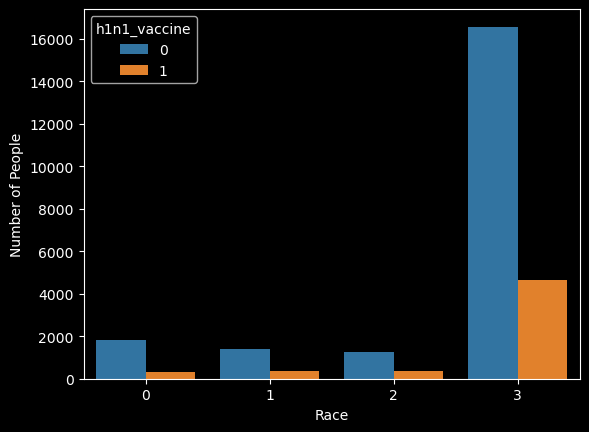

In [142]:
sns.countplot(x = df.race , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Race")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

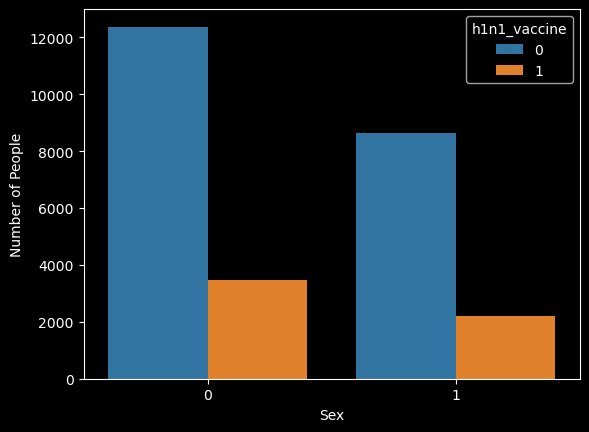

In [143]:
sns.countplot(x = df.sex , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Sex")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

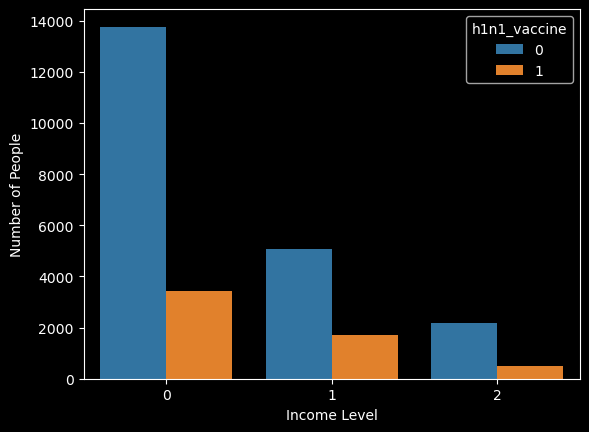

In [144]:
sns.countplot(x = df.income_level , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Income Level")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

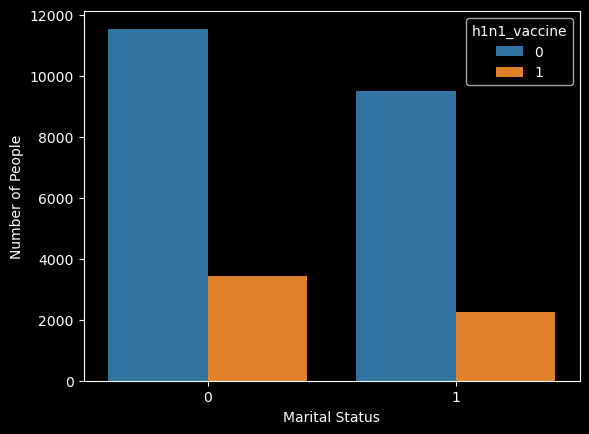

In [145]:
sns.countplot(x = df.marital_status , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Marital Status")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

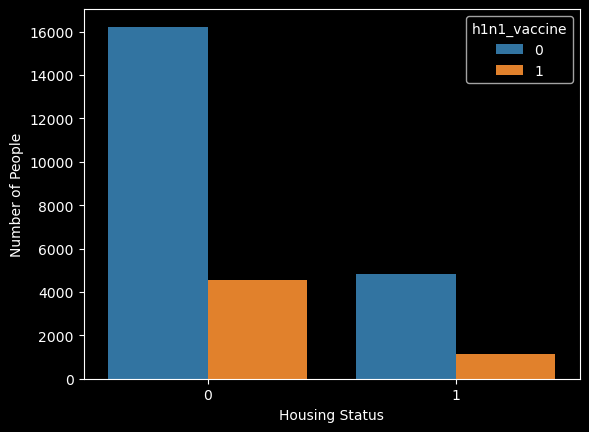

In [146]:
sns.countplot(x = df.housing_status , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Housing Status")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

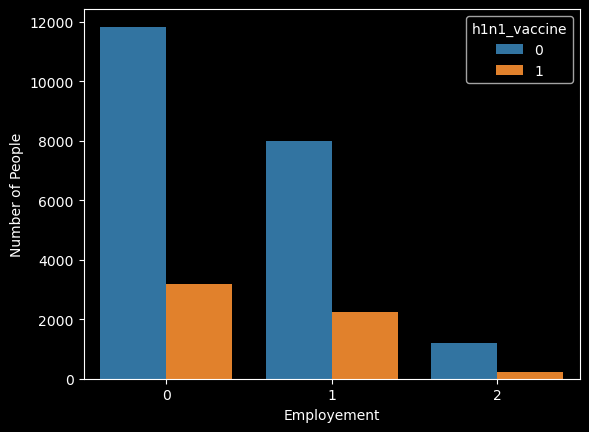

In [147]:
sns.countplot(x = df.employment , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Employement")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

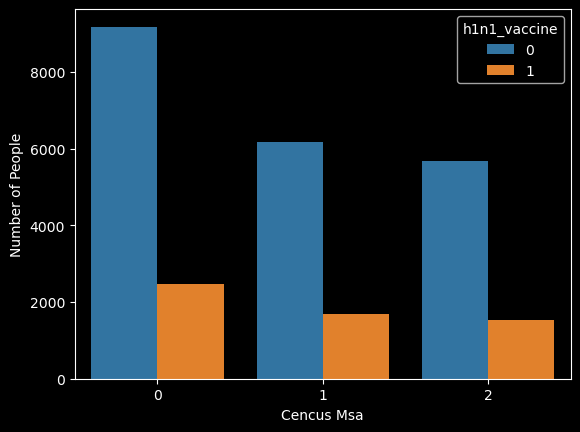

In [148]:
sns.countplot(x = df.census_msa , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Cencus Msa")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

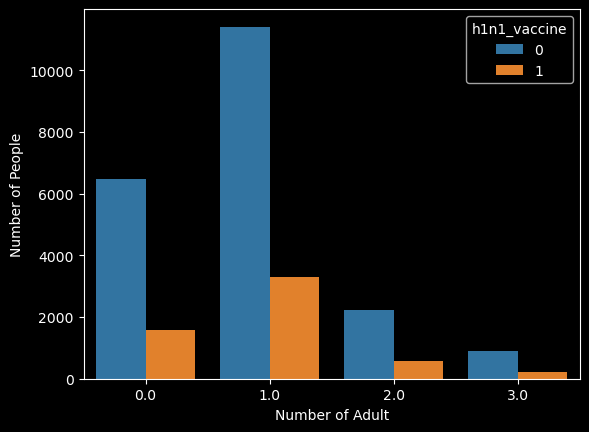

In [149]:
sns.countplot(x = df.no_of_adults , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Number of Adult")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

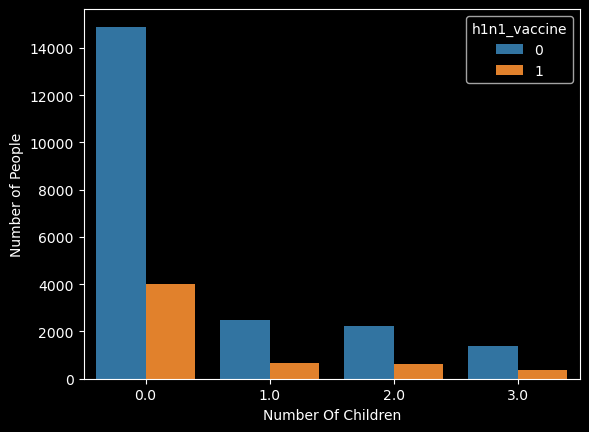

In [150]:
sns.countplot(x = df.no_of_children , hue = df.h1n1_vaccine, palette= 'tab10' )
plt.xlabel("Number Of Children")
plt.ylabel("Number of People")

## Building Model

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [152]:
x = df.drop("h1n1_vaccine", axis =1 )
y = df.h1n1_vaccine

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42) 

In [154]:
le = LogisticRegression(solver = 'liblinear')

In [155]:
le.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [156]:
le.score(x_train, y_train)

0.8354017331764202

In [157]:
le.score(x_test, y_test)

0.8372644452764259

## Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [159]:
tree_model = DecisionTreeClassifier(max_depth= 7)

In [160]:
tree_model.fit(x_train, y_train)
tree_model.score(x_train, y_train)

0.8429977532898256

In [161]:
tree_model.score(x_test, y_test)

0.8291526269811557

## Random Forest

In [162]:
rfc = RandomForestClassifier(n_estimators=200, max_depth= 8, criterion= 'entropy', )
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)

0.8468492564459185

In [163]:
rfc.score(x_test,y_test)

0.8313989766629227

## SVM

In [164]:
sv = SVC() 

In [165]:
sv.fit(x_train, y_train)

SVC()

In [166]:
sv.score(x_train, y_train)

0.8397346742270247

In [167]:
sv.score(x_test, y_test)

0.8375140396855111

## KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
knn_model = KNeighborsClassifier()

In [170]:
knn_model.fit(x_train, y_train)
knn_model.score(x_train, y_train)

0.8558895902428587

In [171]:
knn_model.score(x_test, y_test)

0.8080618994134532

## Confused Matrix

In [172]:
from sklearn.metrics import confusion_matrix

In [173]:
logistic_pred = le.predict(x_test)

Text(0.5, 1.0, 'Confused Matrix Logistic Regression')

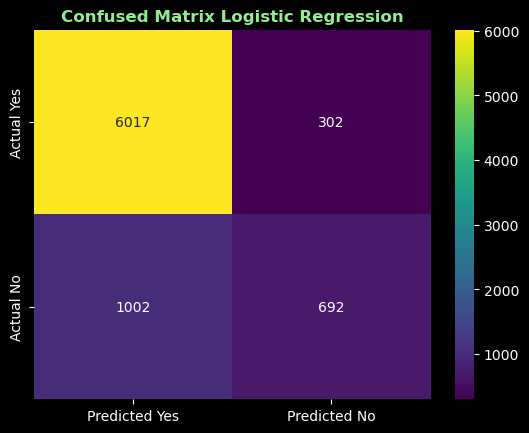

In [174]:
cm = confusion_matrix(y_test, logistic_pred)
df_cm = pd.DataFrame(cm, index=["Actual Yes", "Actual No"], columns=["Predicted Yes", "Predicted No"])
sns.heatmap(df_cm, cmap = 'viridis', annot = True, fmt= 'd' )
plt.title("Confused Matrix Logistic Regression", fontsize= 12, color = 'lightgreen', weight = 'bold' )

<div style="text-align: center; background-color: red; padding: 20px;">
    <h1 style="color:white; font-family: 'Arial', sans-serif;">Thank You</h1>
</div>
